# 摘要
本文针对影响运动意外险购买的因素,收集了四百二十份问卷数据,对问卷进行赋值清洗后,使用逻辑回归模型,对用户是否会购买运动意外险做出来预测.最终通过模糊矩阵对预测结果经行评估

## 1 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [93]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
data = pd.read_excel('252885414_按文本_运动意外险购买意愿影响因素_516_429.xlsx')

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
data.T.head(30)

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
序号,1,2,3,4,5,6,7,8,9,10,...,506,507,508,509,510,511,512,513,514,515
提交答卷时间,2024/2/20 15:02:36,2024/2/20 15:03:17,2024/2/20 15:07:18,2024/2/20 15:18:04,2024/2/20 15:27:13,2024/2/20 15:31:04,2024/2/20 15:46:08,2024/2/20 15:46:27,2024/2/20 15:47:46,2024/2/20 15:49:39,...,2024/2/28 22:08:57,2024/2/29 0:31:55,2024/2/29 0:37:00,2024/2/29 9:03:35,2024/2/29 9:37:48,2024/2/29 10:20:10,2024/2/29 14:25:52,2024/2/29 21:56:17,2024/2/29 22:17:20,2024/2/29 22:44:07
所用时间,42秒,196秒,82秒,95秒,468秒,113秒,93秒,57秒,124秒,70秒,...,79秒,85秒,121秒,71秒,119秒,91秒,168秒,123秒,82秒,61秒
来源,手机提交,微信,手机提交,手机提交,微信,手机提交,互填问卷,互填问卷,互填问卷,互填问卷,...,手机提交,手机提交,手机提交,手机提交,手机提交,手机提交,手机提交,手机提交,手机提交,手机提交
来源详情,直接访问,NaN,直接访问,直接访问,NaN,直接访问,NaN,NaN,NaN,NaN,...,直接访问,直接访问,直接访问,直接访问,直接访问,直接访问,直接访问,直接访问,直接访问,直接访问
来自IP,123.179.7.24(内蒙古-呼和浩特),101.228.180.134(上海-上海),223.102.34.214(辽宁-大连),39.144.101.95(吉林-吉林),183.193.49.11(上海-上海),116.162.94.195(湖南-益阳),27.200.114.137(山东-泰安),39.144.210.15(甘肃-兰州),113.81.25.127(广东-惠州),112.253.108.12(山东-德州),...,39.188.213.109(浙江-宁波),39.144.210.28(甘肃-兰州),114.92.172.253(上海-上海),223.160.138.113(河北-石家庄),124.232.31.220(湖南-长沙),49.93.22.41(江苏-南京),183.95.251.217(湖北-武汉),183.212.188.111(江苏-南京),39.144.159.24(安徽-蚌埠),223.104.40.190(北京-北京)
1、您的性别是？,女,男,男,女,男,女,女,女,女,女,...,男,女,男,女,女,女,女,女,女,女
2、您的年龄是,26-35岁,25岁及以下,25岁及以下,25岁及以下,25岁及以下,25岁及以下,26-35岁,25岁及以下,25岁及以下,25岁及以下,...,25岁及以下,25岁及以下,46-55岁,25岁及以下,25岁及以下,25岁及以下,25岁及以下,26-35岁,25岁及以下,25岁及以下
3、您的受教育程度是,本科,本科,本科,硕士研究生,本科,本科,博士研究生及以上,本科,本科,本科,...,本科,本科,博士研究生及以上,本科,硕士研究生,本科,本科,本科,本科,本科
4、您是独生子女嘛,不是,是的,是的,不是,不是,不是,不是,不是,不是,不是,...,不是,是的,不是,不是,不是,是的,不是,是的,不是,是的


## 2 问卷赋值

In [4]:
data.columns

Index(['序号', '提交答卷时间', '所用时间', '来源', '来源详情', '来自IP', '1、您的性别是？', '2、您的年龄是',
       '3、您的受教育程度是', '4、您是独生子女嘛', '5、您的职业是', '6、您的年收入是', '7、每年您在高风险运动上的支出金额',
       '8、除去节假日，您平均每月的闲暇时间是', '9、您通常喜欢尝试哪类高风险运动', '10、您每年节假日为了运动外出的频率大约是',
       '11、您每年参与高风险户外运动（如滑板、滑雪、攀岩等）的次数大约是', '12、如果您不小心在运动中受伤了，能负担卧床期间的开销吗？',
       '13、您对运动意外险的认知是', '14、您是否主动购买过其他保险（不是由他人或组织代为购买），如：人寿保险、医疗费用险、意外险等。',
       '15、您是否购会为家人的身体健康配置保险？', '16、购买运动意外险（价格按照风险系数为每年6元-30元不等）是否会成为额外的经济负担？',
       '17、如果您在运动中发生了伤害，意外险的保费能弥补一些您家人的精神损伤以及财务支出吗？',
       '18、运动意外险带来的保费是否能弥补，您因受伤接下来无法运动的遗憾？', '19、您认为以下哪些因素会导致您不选择配置运动意外险',
       '20、如果您决定购买运动意外险，您会选择多长时间的保障时间',
       '21、如果您决定购买运动意外险，您会选择以下哪种险种配置（以30天保障方案为例，每人具体保费会有变动）',
       '22、经过了解之后，您是否愿意为自己配置一份运动意外险？', '23、您未来会向周围的朋友科普运动意外险吗', '总分'],
      dtype='object')

In [5]:
def fuzhi(data,list):
    df = data.copy()
    for i in range(len(data.columns)):
        if i in list:    #自己决定要赋值的列编号
            print(i,':',data.columns[i])    #输出问题名称
            for k in range(len(data.iloc[:,i].unique())):
                print(data.iloc[:,i].unique()[k],'=',k)    #输出给变量赋的数字
                for j in range(len(data.iloc[:,i])):
                    if data.iloc[j,i] == data.iloc[:,i].unique()[k]:
                       df.iloc[j,i] = k    #赋值
            df[data.columns[i]] = df[data.columns[i]].astype('int64')
        else:
            print('>>>',data.columns[i],'X')    #输出没有被赋值的名称
    return df

In [6]:
df = fuzhi(data,[6,9,10,17,18,19,20,21,22,23,24,22,27,28])

>>> 序号 X
>>> 提交答卷时间 X
>>> 所用时间 X
>>> 来源 X
>>> 来源详情 X
>>> 来自IP X
6 : 1、您的性别是？
女 = 0
男 = 1
>>> 2、您的年龄是 X
>>> 3、您的受教育程度是 X
9 : 4、您是独生子女嘛
不是 = 0
是的 = 1
10 : 5、您的职业是
学生 = 0
公司职员 = 1
自由职业者 = 2
退休 = 3
>>> 6、您的年收入是 X
>>> 7、每年您在高风险运动上的支出金额 X
>>> 8、除去节假日，您平均每月的闲暇时间是 X
>>> 9、您通常喜欢尝试哪类高风险运动 X
>>> 10、您每年节假日为了运动外出的频率大约是 X
>>> 11、您每年参与高风险户外运动（如滑板、滑雪、攀岩等）的次数大约是 X
17 : 12、如果您不小心在运动中受伤了，能负担卧床期间的开销吗？
能，但有点压力 = 0
能，有一定积蓄 = 1
不太能 = 2
18 : 13、您对运动意外险的认知是
仔细了解过但没购买 = 0
简单听说过 = 1
了解清楚并购买了 = 2
没了解但购买了 = 3
19 : 14、您是否主动购买过其他保险（不是由他人或组织代为购买），如：人寿保险、医疗费用险、意外险等。
是 = 0
否 = 1
20 : 15、您是否购会为家人的身体健康配置保险？
会 = 0
不会 = 1
21 : 16、购买运动意外险（价格按照风险系数为每年6元-30元不等）是否会成为额外的经济负担？
否 = 0
是 = 1
22 : 17、如果您在运动中发生了伤害，意外险的保费能弥补一些您家人的精神损伤以及财务支出吗？
能 = 0
不能 = 1
23 : 18、运动意外险带来的保费是否能弥补，您因受伤接下来无法运动的遗憾？
可以弥补 = 0
不可以 = 1
24 : 19、您认为以下哪些因素会导致您不选择配置运动意外险
要缴纳的产品保险费太高 = 0
没必要多一笔花销 = 1
之前不了解运动意外险 = 2
现有保险产品性价比太低 = 3
自身收入难以支持 = 4
>>> 20、如果您决定购买运动意外险，您会选择多长时间的保障时间 X
>>> 21、如果您决定购买运动意外险，您会选择以下哪种险种配置（以30天保障方案为例，每人具体保费会有变动） X
27 : 22、经过了解之后，您是否愿意为自己配置一份运

In [7]:
df['sex'] = df['1、您的性别是？']
df = df.drop('1、您的性别是？',axis = 1)

In [8]:
df['age'] = data['2、您的年龄是']

In [9]:
for i in range(len(df['age'])):
    if df.loc[i,'age'] == '26-35岁':
        df.loc[i,'age'] = 1
    elif df.loc[i,'age'] == '25岁及以下':
        df.loc[i,'age'] = 0
    elif df.loc[i,'age'] == '36-45岁':
        df.loc[i,'age'] = 2
    elif df.loc[i,'age'] == '46-55岁':
        df.loc[i,'age'] = 3
    elif df.loc[i,'age'] == '55岁以上':
        df.loc[i,'age'] = 4
df['age'] = df['age'].astype('int64')
df['age']

0      1
1      0
2      0
3      0
4      0
      ..
424    0
425    0
426    1
427    0
428    0
Name: age, Length: 429, dtype: int64

In [10]:
df['education_level'] = data['3、您的受教育程度是']

df['education_level'].unique()

array(['本科', '硕士研究生', '博士研究生及以上', '高中及以下', '大专'], dtype=object)

In [11]:
for i in range(len(df['education_level'])):
    if df.loc[i,'education_level'] == '高中及以下':
        df.loc[i,'education_level'] = 0
    elif df.loc[i,'education_level'] == '大专':
        df.loc[i,'education_level'] = 1
    elif df.loc[i,'education_level'] == '本科':
        df.loc[i,'education_level'] = 2
    elif df.loc[i,'education_level'] == '硕士研究生':
        df.loc[i,'education_level'] = 3
    elif df.loc[i,'education_level'] == '博士研究生及以上':
        df.loc[i,'education_level'] = 4
df['education_level'] = df['education_level'].astype('int64')
df['education_level']

0      2
1      2
2      2
3      3
4      2
      ..
424    2
425    2
426    2
427    2
428    2
Name: education_level, Length: 429, dtype: int64

In [12]:
df['7、每年您在高风险运动上的支出金额'] = data['7、每年您在高风险运动上的支出金额']
df['7、每年您在高风险运动上的支出金额'].unique()

array(['1000以下', '1000-3000', '5000及以上', '3000-5000'], dtype=object)

In [13]:
for i in range(len(df['7、每年您在高风险运动上的支出金额'])):
    if df.loc[i,'7、每年您在高风险运动上的支出金额'] == '1000以下':
        df.loc[i,'7、每年您在高风险运动上的支出金额'] = 0
    elif df.loc[i,'7、每年您在高风险运动上的支出金额'] == '1000-3000':
        df.loc[i,'7、每年您在高风险运动上的支出金额'] = 1
    elif df.loc[i,'7、每年您在高风险运动上的支出金额'] == '3000-5000':
        df.loc[i,'7、每年您在高风险运动上的支出金额'] = 2
    elif df.loc[i,'7、每年您在高风险运动上的支出金额'] == '5000及以上':
        df.loc[i,'7、每年您在高风险运动上的支出金额'] = 3
    # elif df.loc[i,'7、每年您在高风险运动上的支出金额'] == '博士研究生及以上':
    #     df.loc[i,'7、每年您在高风险运动上的支出金额'] = 4
df['7、每年您在高风险运动上的支出金额'] = df['7、每年您在高风险运动上的支出金额'].astype('int64')
df['7、每年您在高风险运动上的支出金额'].unique()

array([0, 1, 3, 2], dtype=int64)

In [14]:
df['salary'] = data['6、您的年收入是']
df['salary'].unique()

array(['5万元以下', '5万-10万', '10万元-20万元', '20万元以上'], dtype=object)

In [15]:
for i in range(len(df['salary'])):
    if df.loc[i,'salary'] == '5万元以下':
        df.loc[i,'salary'] = 0
    elif df.loc[i,'salary'] == '5万-10万':
        df.loc[i,'salary'] = 1
    elif df.loc[i,'salary'] == '10万元-20万元':
        df.loc[i,'salary'] = 2
    elif df.loc[i,'salary'] == '20万元以上':
        df.loc[i,'salary'] = 3
    # elif df.loc[i,'salary'] == '博士研究生及以上':
    #     df.loc[i,'salary'] = 4
df['salary'] = df['salary'].astype('int64')
df['salary'].unique()

array([0, 1, 2, 3], dtype=int64)

In [16]:
name = '8、除去节假日，您平均每月的闲暇时间是'
# df[name] = data[name]
df[name].unique()

array(['48-96小时（2-4天）', '96小时-192小时（4-8天）', '不足48小时（不足2天）',
       '192小时以上（8天以上）'], dtype=object)

In [17]:
for i in range(len(df[name])):
    if df.loc[i,name] == '不足48小时（不足2天）':
        df.loc[i,name] = 0
    elif df.loc[i,name] == '48-96小时（2-4天）':
        df.loc[i,name] = 1
    elif df.loc[i,name] == '96小时-192小时（4-8天）':
        df.loc[i,name] = 2
    elif df.loc[i,name] == '192小时以上（8天以上）':
        df.loc[i,name] = 3
    # elif df.loc[i,name] == '博士研究生及以上':
    #     df.loc[i,name] = 4
df[name] = df[name].astype('int64')
df[name].unique()

array([1, 2, 0, 3], dtype=int64)

In [18]:
name = '10、您每年节假日为了运动外出的频率大约是'
# df[name] = data[name]
df[name].unique()

array(['基本每个节假日都去', '每年1次', '每年2-4次', '每年4次以上'], dtype=object)

In [19]:
for i in range(len(df[name])):
    if df.loc[i,name] == '每年1次':
        df.loc[i,name] = 0
    elif df.loc[i,name] == '每年2-4次':
        df.loc[i,name] = 1
    elif df.loc[i,name] == '每年4次以上':
        df.loc[i,name] = 2
    elif df.loc[i,name] == '基本每个节假日都去':
        df.loc[i,name] = 3
    # elif df.loc[i,name] == '博士研究生及以上':
    #     df.loc[i,name] = 4
df[name] = df[name].astype('int64')
df[name].unique()

array([3, 0, 1, 2], dtype=int64)

In [20]:
df = df.drop('9、您通常喜欢尝试哪类高风险运动',axis = 1)

In [21]:
name = '20、如果您决定购买运动意外险，您会选择多长时间的保障时间'
# df[name] = data[name]
df[name].unique()

array(['180天', '1天', '30天', '1年', '7天'], dtype=object)

In [22]:
for i in range(len(df[name])):
    if df.loc[i,name] == '1天':
        df.loc[i,name] = 0
    elif df.loc[i,name] == '7天':
        df.loc[i,name] = 1
    elif df.loc[i,name] == '30天':
        df.loc[i,name] = 2
    elif df.loc[i,name] == '180天':
        df.loc[i,name] = 3
    elif df.loc[i,name] == '1年':
        df.loc[i,name] = 4
df[name] = df[name].astype('int64')
df[name].unique()

array([3, 0, 2, 4, 1], dtype=int64)

In [23]:
name = '21、如果您决定购买运动意外险，您会选择以下哪种险种配置（以30天保障方案为例，每人具体保费会有变动）'
# df[name] = data[name]
df[name].unique()

array(['2.75元每年，最高可以赔付20万', '8.24元每月，最高可以赔付60万', '13.73元每月，最高可以赔付100万'],
      dtype=object)

In [24]:
for i in range(len(df[name])):
    if df.loc[i,name] == '2.75元每年，最高可以赔付20万':
        df.loc[i,name] = 0
    elif df.loc[i,name] == '8.24元每月，最高可以赔付60万':
        df.loc[i,name] = 1
    elif df.loc[i,name] == '13.73元每月，最高可以赔付100万':
        df.loc[i,name] = 2
    # elif df.loc[i,name] == '180天':
    #     df.loc[i,name] = 3
    # elif df.loc[i,name] == '1年':
    #     df.loc[i,name] = 4
df[name] = df[name].astype('int64')
df[name].unique()

array([0, 1, 2], dtype=int64)

In [26]:
df

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,2、您的年龄是,3、您的受教育程度是,4、您是独生子女嘛,5、您的职业是,...,19、您认为以下哪些因素会导致您不选择配置运动意外险,20、如果您决定购买运动意外险，您会选择多长时间的保障时间,21、如果您决定购买运动意外险，您会选择以下哪种险种配置（以30天保障方案为例，每人具体保费会有变动）,22、经过了解之后，您是否愿意为自己配置一份运动意外险？,23、您未来会向周围的朋友科普运动意外险吗,总分,sex,age,education_level,salary
0,1,2024/2/20 15:02:36,42秒,手机提交,直接访问,123.179.7.24(内蒙古-呼和浩特),26-35岁,本科,0,0,...,0,3,0,0,0,44,0,1,2,0
1,2,2024/2/20 15:03:17,196秒,微信,NaN,101.228.180.134(上海-上海),25岁及以下,本科,1,0,...,1,0,0,0,0,1,1,0,2,0
2,3,2024/2/20 15:07:18,82秒,手机提交,直接访问,223.102.34.214(辽宁-大连),25岁及以下,本科,1,0,...,2,2,1,0,1,2,1,0,2,0
3,4,2024/2/20 15:18:04,95秒,手机提交,直接访问,39.144.101.95(吉林-吉林),25岁及以下,硕士研究生,0,0,...,1,4,0,0,0,3,0,0,3,0
4,5,2024/2/20 15:27:13,468秒,微信,NaN,183.193.49.11(上海-上海),25岁及以下,本科,0,0,...,2,1,0,0,0,10,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,511,2024/2/29 10:20:10,91秒,手机提交,直接访问,49.93.22.41(江苏-南京),25岁及以下,本科,1,0,...,3,4,2,0,0,1,0,0,2,0
425,512,2024/2/29 14:25:52,168秒,手机提交,直接访问,183.95.251.217(湖北-武汉),25岁及以下,本科,0,0,...,3,4,1,0,0,0,0,0,2,0
426,513,2024/2/29 21:56:17,123秒,手机提交,直接访问,183.212.188.111(江苏-南京),26-35岁,本科,1,0,...,3,1,0,0,0,43,0,1,2,0
427,514,2024/2/29 22:17:20,82秒,手机提交,直接访问,39.144.159.24(安徽-蚌埠),25岁及以下,本科,0,0,...,2,1,1,0,0,9,0,0,2,0


In [28]:
for i in df.columns:
    if i.find('、') != -1:
        df[i.split('、')[1]] = df[i]
        df = df.drop(i,axis = 1)
df

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,sex,age,education_level,...,您是否主动购买过其他保险（不是由他人或组织代为购买），如：人寿保险,您是否购会为家人的身体健康配置保险？,购买运动意外险（价格按照风险系数为每年6元-30元不等）是否会成为额外的经济负担？,如果您在运动中发生了伤害，意外险的保费能弥补一些您家人的精神损伤以及财务支出吗？,运动意外险带来的保费是否能弥补，您因受伤接下来无法运动的遗憾？,您认为以下哪些因素会导致您不选择配置运动意外险,如果您决定购买运动意外险，您会选择多长时间的保障时间,如果您决定购买运动意外险，您会选择以下哪种险种配置（以30天保障方案为例，每人具体保费会有变动）,经过了解之后，您是否愿意为自己配置一份运动意外险？,您未来会向周围的朋友科普运动意外险吗
0,1,2024/2/20 15:02:36,42秒,手机提交,直接访问,123.179.7.24(内蒙古-呼和浩特),44,0,1,2,...,0,0,0,0,0,0,3,0,0,0
1,2,2024/2/20 15:03:17,196秒,微信,NaN,101.228.180.134(上海-上海),1,1,0,2,...,0,0,0,0,1,1,0,0,0,0
2,3,2024/2/20 15:07:18,82秒,手机提交,直接访问,223.102.34.214(辽宁-大连),2,1,0,2,...,0,0,0,1,1,2,2,1,0,1
3,4,2024/2/20 15:18:04,95秒,手机提交,直接访问,39.144.101.95(吉林-吉林),3,0,0,3,...,0,0,1,0,1,1,4,0,0,0
4,5,2024/2/20 15:27:13,468秒,微信,NaN,183.193.49.11(上海-上海),10,1,0,2,...,0,1,0,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,511,2024/2/29 10:20:10,91秒,手机提交,直接访问,49.93.22.41(江苏-南京),1,0,0,2,...,0,0,0,0,1,3,4,2,0,0
425,512,2024/2/29 14:25:52,168秒,手机提交,直接访问,183.95.251.217(湖北-武汉),0,0,0,2,...,1,0,1,1,1,3,4,1,0,0
426,513,2024/2/29 21:56:17,123秒,手机提交,直接访问,183.212.188.111(江苏-南京),43,0,1,2,...,0,0,0,0,1,3,1,0,0,0
427,514,2024/2/29 22:17:20,82秒,手机提交,直接访问,39.144.159.24(安徽-蚌埠),9,0,0,2,...,1,0,1,1,1,2,1,1,0,0


In [47]:
df = df.drop(['序号','提交答卷时间','所用时间','来源','来源详情','来自IP','总分','您的年龄是','您的受教育程度是','您的年收入是'],axis = 1)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   sex                                               429 non-null    int64
 1   age                                               429 non-null    int64
 2   education_level                                   429 non-null    int64
 3   salary                                            429 non-null    int64
 4   您是独生子女嘛                                           429 non-null    int64
 5   您的职业是                                             429 non-null    int64
 6   每年您在高风险运动上的支出金额                                   429 non-null    int64
 7   除去节假日，您平均每月的闲暇时间是                                 429 non-null    int64
 8   您每年节假日为了运动外出的频率大约是                                429 non-null    int64
 9   您每年参与高风险户外运动（如滑板                           

## 3 区分测试集与训练集

In [49]:
df_feature = df.drop('经过了解之后，您是否愿意为自己配置一份运动意外险？',axis = 1)

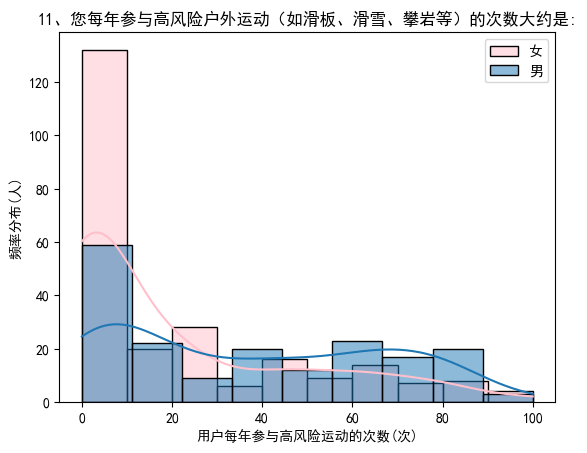

In [111]:
sns.histplot(data = df_feature[df_feature['sex']==0]['您每年参与高风险户外运动（如滑板'],kde = True,color = 'pink',label = '女')
sns.histplot(data = df_feature[df_feature['sex']==1]['您每年参与高风险户外运动（如滑板'],kde = True,alpha = 0.5,label = '男')
plt.xlabel('用户每年参与高风险运动的次数(次)')
plt.ylabel('频率分布(人)')
plt.title('11、您每年参与高风险户外运动（如滑板、滑雪、攀岩等）的次数大约是:')
plt.legend()
plt.show()

In [50]:
df_target = df['经过了解之后，您是否愿意为自己配置一份运动意外险？']

In [51]:
X = df_feature
y = df_target

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [53]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 343 entries, 289 to 172
Series name: 经过了解之后，您是否愿意为自己配置一份运动意外险？
Non-Null Count  Dtype
--------------  -----
343 non-null    int64
dtypes: int64(1)
memory usage: 5.4 KB


## 4 模型建立

In [54]:
log_reg = LogisticRegression(max_iter=1000)

In [55]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [56]:
log_reg.score(X_test,y_test)

0.9418604651162791

In [74]:
test_pred = log_reg.predict(X_test)
train_pred = log_reg.predict(X_train)

In [57]:
log_reg.coef_

array([[ 0.26269523, -0.35227378,  0.26507178,  0.2301115 ,  0.78558641,
         0.76323966, -0.64016261,  0.58769274, -0.40899038, -0.00602059,
         0.3366726 , -0.09113452,  1.06876479,  0.80915301,  0.40794401,
         0.60281653,  0.27978191, -0.12936476,  0.21945674,  0.01198938,
         2.55667594]])

In [58]:
log_reg.intercept_

array([-6.10875471])

## 5 结果评估

In [75]:
metrics.accuracy_score(y_test,test_pred)

0.9418604651162791

In [77]:
confusion_metrics_result = metrics.confusion_matrix(y_test,test_pred)
confusion_metrics_result

array([[78,  1],
       [ 4,  3]], dtype=int64)

<Axes: >

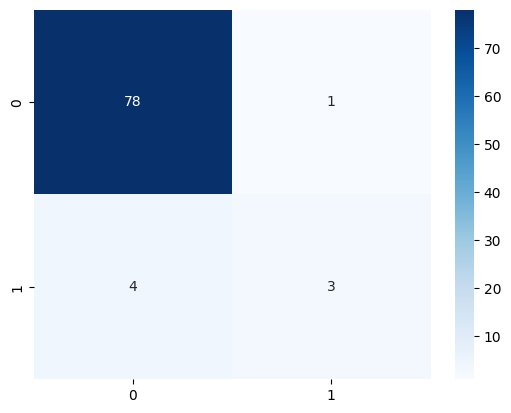

In [78]:
sns.heatmap(confusion_metrics_result, annot=True, cmap='Blues')

最终模型评分0.94,模糊矩阵预测错误数为5,可见预测效果较好